## IMAGE CLASSIFICATION

### Imports

In [2]:
#IMPORTS
import tensorflow as tf
from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
os.environ['TF_XLA_FLAGS']='--tf_xla_enable_xla_devices'

### Load Datasets

In [4]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [7]:
y_classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
len(y_classes)

10

### Observe Dataset

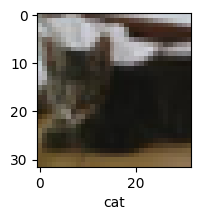

In [9]:
def showImage(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(y_classes[y[index]])
showImage(x_train,y_train,9)

### Normalize data

In [10]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [11]:
x_train=x_train/255
x_test=x_test/255

In [12]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

### Building Model


In [13]:
model =Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(4,4),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(units=34,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
print("building finished")

C:\collandperswork\PROJECTS\ImageClassification\imageclass\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


building finished


### Compile Model

In [14]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Train the Model

In [15]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 31ms/step - accuracy: 0.3533 - loss: 1.7507 - val_accuracy: 0.5758 - val_loss: 1.2052
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.5956 - loss: 1.1529 - val_accuracy: 0.6227 - val_loss: 1.0783
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.6536 - loss: 0.9933 - val_accuracy: 0.6589 - val_loss: 0.9831
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.6860 - loss: 0.9048 - val_accuracy: 0.6651 - val_loss: 0.9687
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.7129 - loss: 0.8358 - val_accuracy: 0.6722 - val_loss: 0.9353


### Making predictions

In [16]:
y_predictions=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [17]:
y_predictions[9]

array([2.8342290e-03, 9.6238416e-01, 1.4057852e-04, 3.5846105e-04,
       2.0651458e-05, 9.9106204e-05, 8.0324156e-04, 2.5782538e-05,
       2.9949755e-03, 3.0338818e-02], dtype=float32)

In [18]:
y_predictions=[np.argmax(arr) for arr in y_predictions]

In [19]:
y_test=y_test.reshape(-1)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [20]:
y_predictions[9]

1

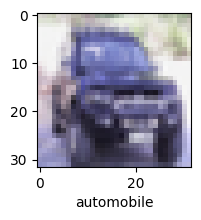

In [36]:
showImage(x_test,y_test,9)

### Evaluate Model

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 64)          │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 34)                  │          78,370 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             350 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 337,346 (1.29 MB)

 Trainable params: 112,448 (439.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 224,898 (878.51 KB)

In [23]:
print(x_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000,)


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1000
           1       0.80      0.82      0.81      1000
           2       0.47      0.68      0.56      1000
           3       0.54      0.37      0.44      1000
           4       0.77      0.44      0.56      1000
           5       0.57      0.60      0.59      1000
           6       0.61      0.86      0.72      1000
           7       0.77      0.72      0.75      1000
           8       0.77      0.83      0.80      1000
           9       0.87      0.66      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.67     10000
weighted avg       0.69      0.67      0.67     10000



In [30]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_predictions)

In [31]:
cm

array([[733,  15, 100,  13,   3,  10,  10,  13,  84,  19],
       [ 30, 822,  13,  13,   0,   7,  22,   6,  33,  54],
       [ 49,   5, 682,  36,  35,  63,  84,  27,  18,   1],
       [ 23,   7, 148, 370,  25, 205, 168,  29,  21,   4],
       [ 42,   5, 195,  47, 441,  43, 136,  73,  16,   2],
       [ 13,   3, 114, 126,  20, 603,  65,  39,  14,   3],
       [  4,   2,  67,  29,  10,  20, 859,   2,   7,   0],
       [ 23,   6,  85,  21,  36,  81,  21, 722,   4,   1],
       [ 80,  23,  24,   9,   1,   4,  10,   2, 833,  14],
       [ 56, 136,  23,  16,   4,  15,  23,  24,  46, 657]], dtype=int64)

In [34]:
import seaborn as sns

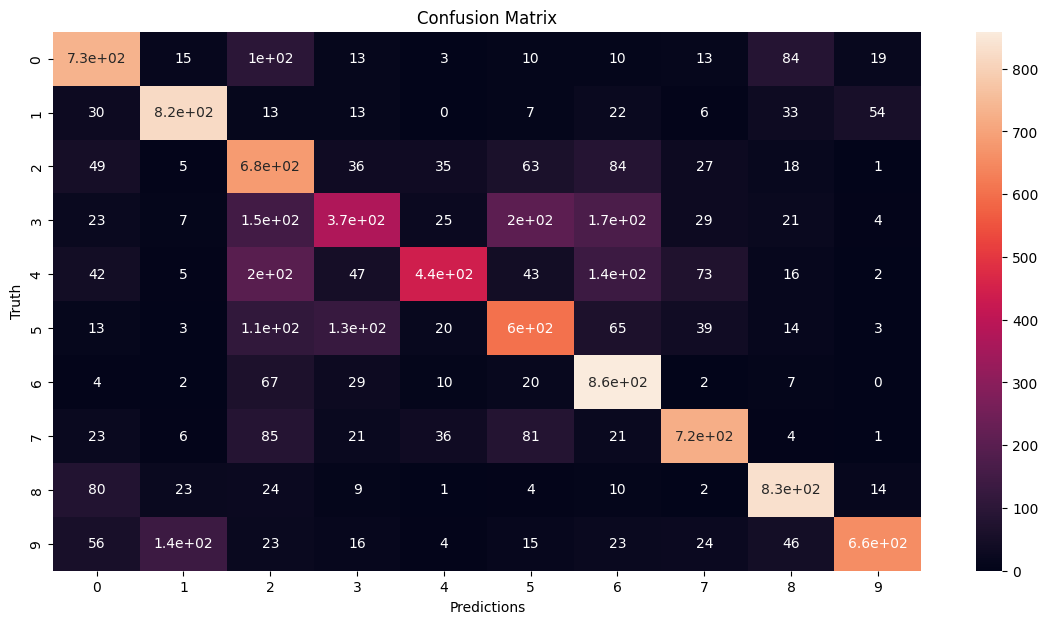

In [35]:
plt.figure(figsize=(14,7))
sns.heatmap(cm,annot=True)
plt.ylabel("Truth")
plt.xlabel("Predictions")
plt.title("Confusion Matrix")
plt.show()